In [1]:
import pandas as pd
import numpy as np
from os.path import join
import json
import re
from collections import Counter
from tqdm import tqdm
import textdistance

In [2]:
path = 'texts_in_books.json'
json_file = open(path)
json_data = json.load(json_file)

In [14]:
def get_texts(book_id,json_data):
    texts_list = []
    for book in json_data:
        if book['id'] == book_id:
            texts = book['texts']
            for text in texts:
                text_id = text['id']
                texts_list.append(text_id)
    return texts_list     


def get_title(book_id,json_data):
    texts_list = []
    title = None
    for book in json_data:
        if book['id'] == book_id:
            title = book['title']
    return title


In [4]:
book_ids = []
distances = []


for book in tqdm(json_data):
    book_texts = get_texts(book['id'],json_data)
    for other_book in json_data:
        if other_book['id'] != book['id']:
            other_book_texts = get_texts(other_book['id'],json_data)
            #textdistance.levenshtein.similarity(book_texts,other_book_texts))
            value = textdistance.levenshtein.distance(book_texts,other_book_texts)
            if value < (len(book_texts)/2):
                book_ids.append(book['id'])
                book_ids.append(other_book['id'])
                distances.append( (book['id'],other_book['id'],value) ) 
            

100%|█████████████████████████████████████████| 303/303 [00:54<00:00,  5.56it/s]


In [5]:
matrix_columns=['book_id']
matrix_columns.extend(list(set(book_ids)))
len(matrix_columns)

108

In [6]:
distances_df = pd.DataFrame(distances,columns=['row','column','value'])

In [7]:
#df = pd.DataFrame(columns=matrix_columns)

In [8]:
distances_df

,row,column,value
0,125586,125619,2
1,125586,125308,3
2,125586,125326,3
3,125393,125330,6
4,131483,131345,0
...,...,...,...
964,125407,130439,3
965,125416,135674,7
966,125416,139054,5
967,125416,125308,7


In [9]:
rows = []
for book in matrix_columns[1:]:

    #print(book)

    ids = []
    similar_books = distances_df.query( f'row=={book}' )
    if similar_books.shape[0]>1:
        ids = similar_books['column'].tolist()
        
    row = []
    row.append(book)
    for column in matrix_columns[1:]:
        if column in ids:
            row.append(similar_books.query(f'column=={column}')['value'].iloc[0])
        elif column == book:
            row.append('0')
        else:
            row.append(None)
    rows.append(row)
    
df = pd.DataFrame(rows,columns=matrix_columns,dtype="float")
df['book_id'] = df['book_id'].astype(int)
df = df.set_index('book_id')
            

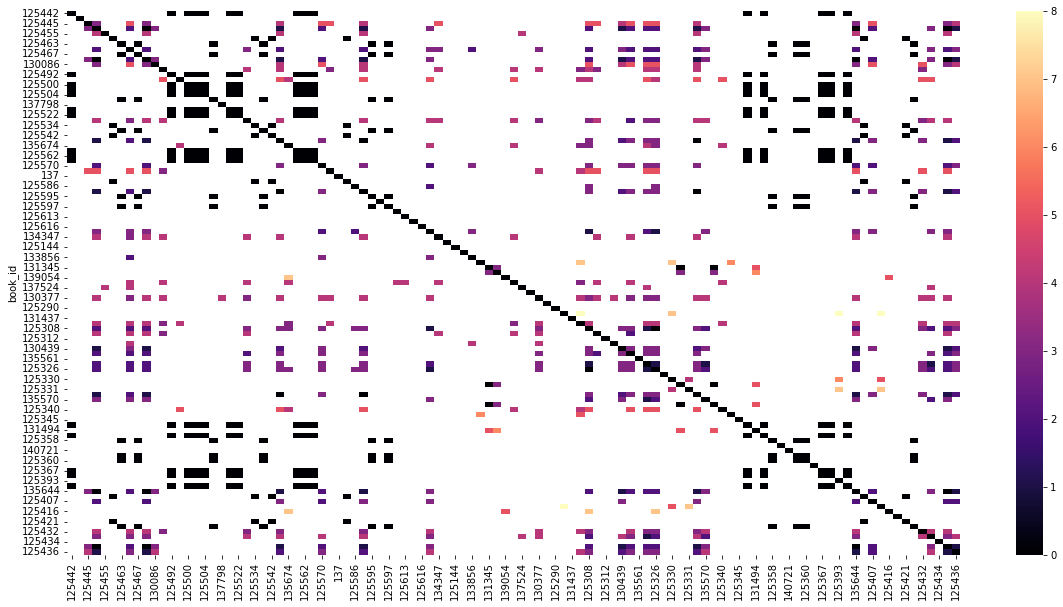

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure( figsize=( 20 , 10 ) )

# Heatmap
ax = sns.heatmap( df , cmap= sns.color_palette("magma", as_cmap=True)  )



In [18]:

book_id = 131483
print(get_title(book_id,json_data))
print(get_texts(book_id,json_data))

book_id = 131345
print(get_title(book_id,json_data))
print(get_texts(book_id,json_data))

169 G 49
[129074, 631, 125147, 461, 164, 695, 521, 466, 517, 125188, 132339, 130068, 135517, 127533, 125687, 135685, 168, 171, 127529, 127539, 135722, 135714, 127675, 135716, 135717, 135719, 135720, 135721]
Paris, BnF, B-2975
[129074, 631, 125147, 461, 164, 695, 521, 466, 517, 125188, 132339, 130068, 135517, 127533, 125687, 135685, 168, 171, 127529, 127539, 135722, 135714, 127675, 135716, 135717, 135719, 135720, 135721]
